# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [49]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
# Are there any missing values in the dataset?
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


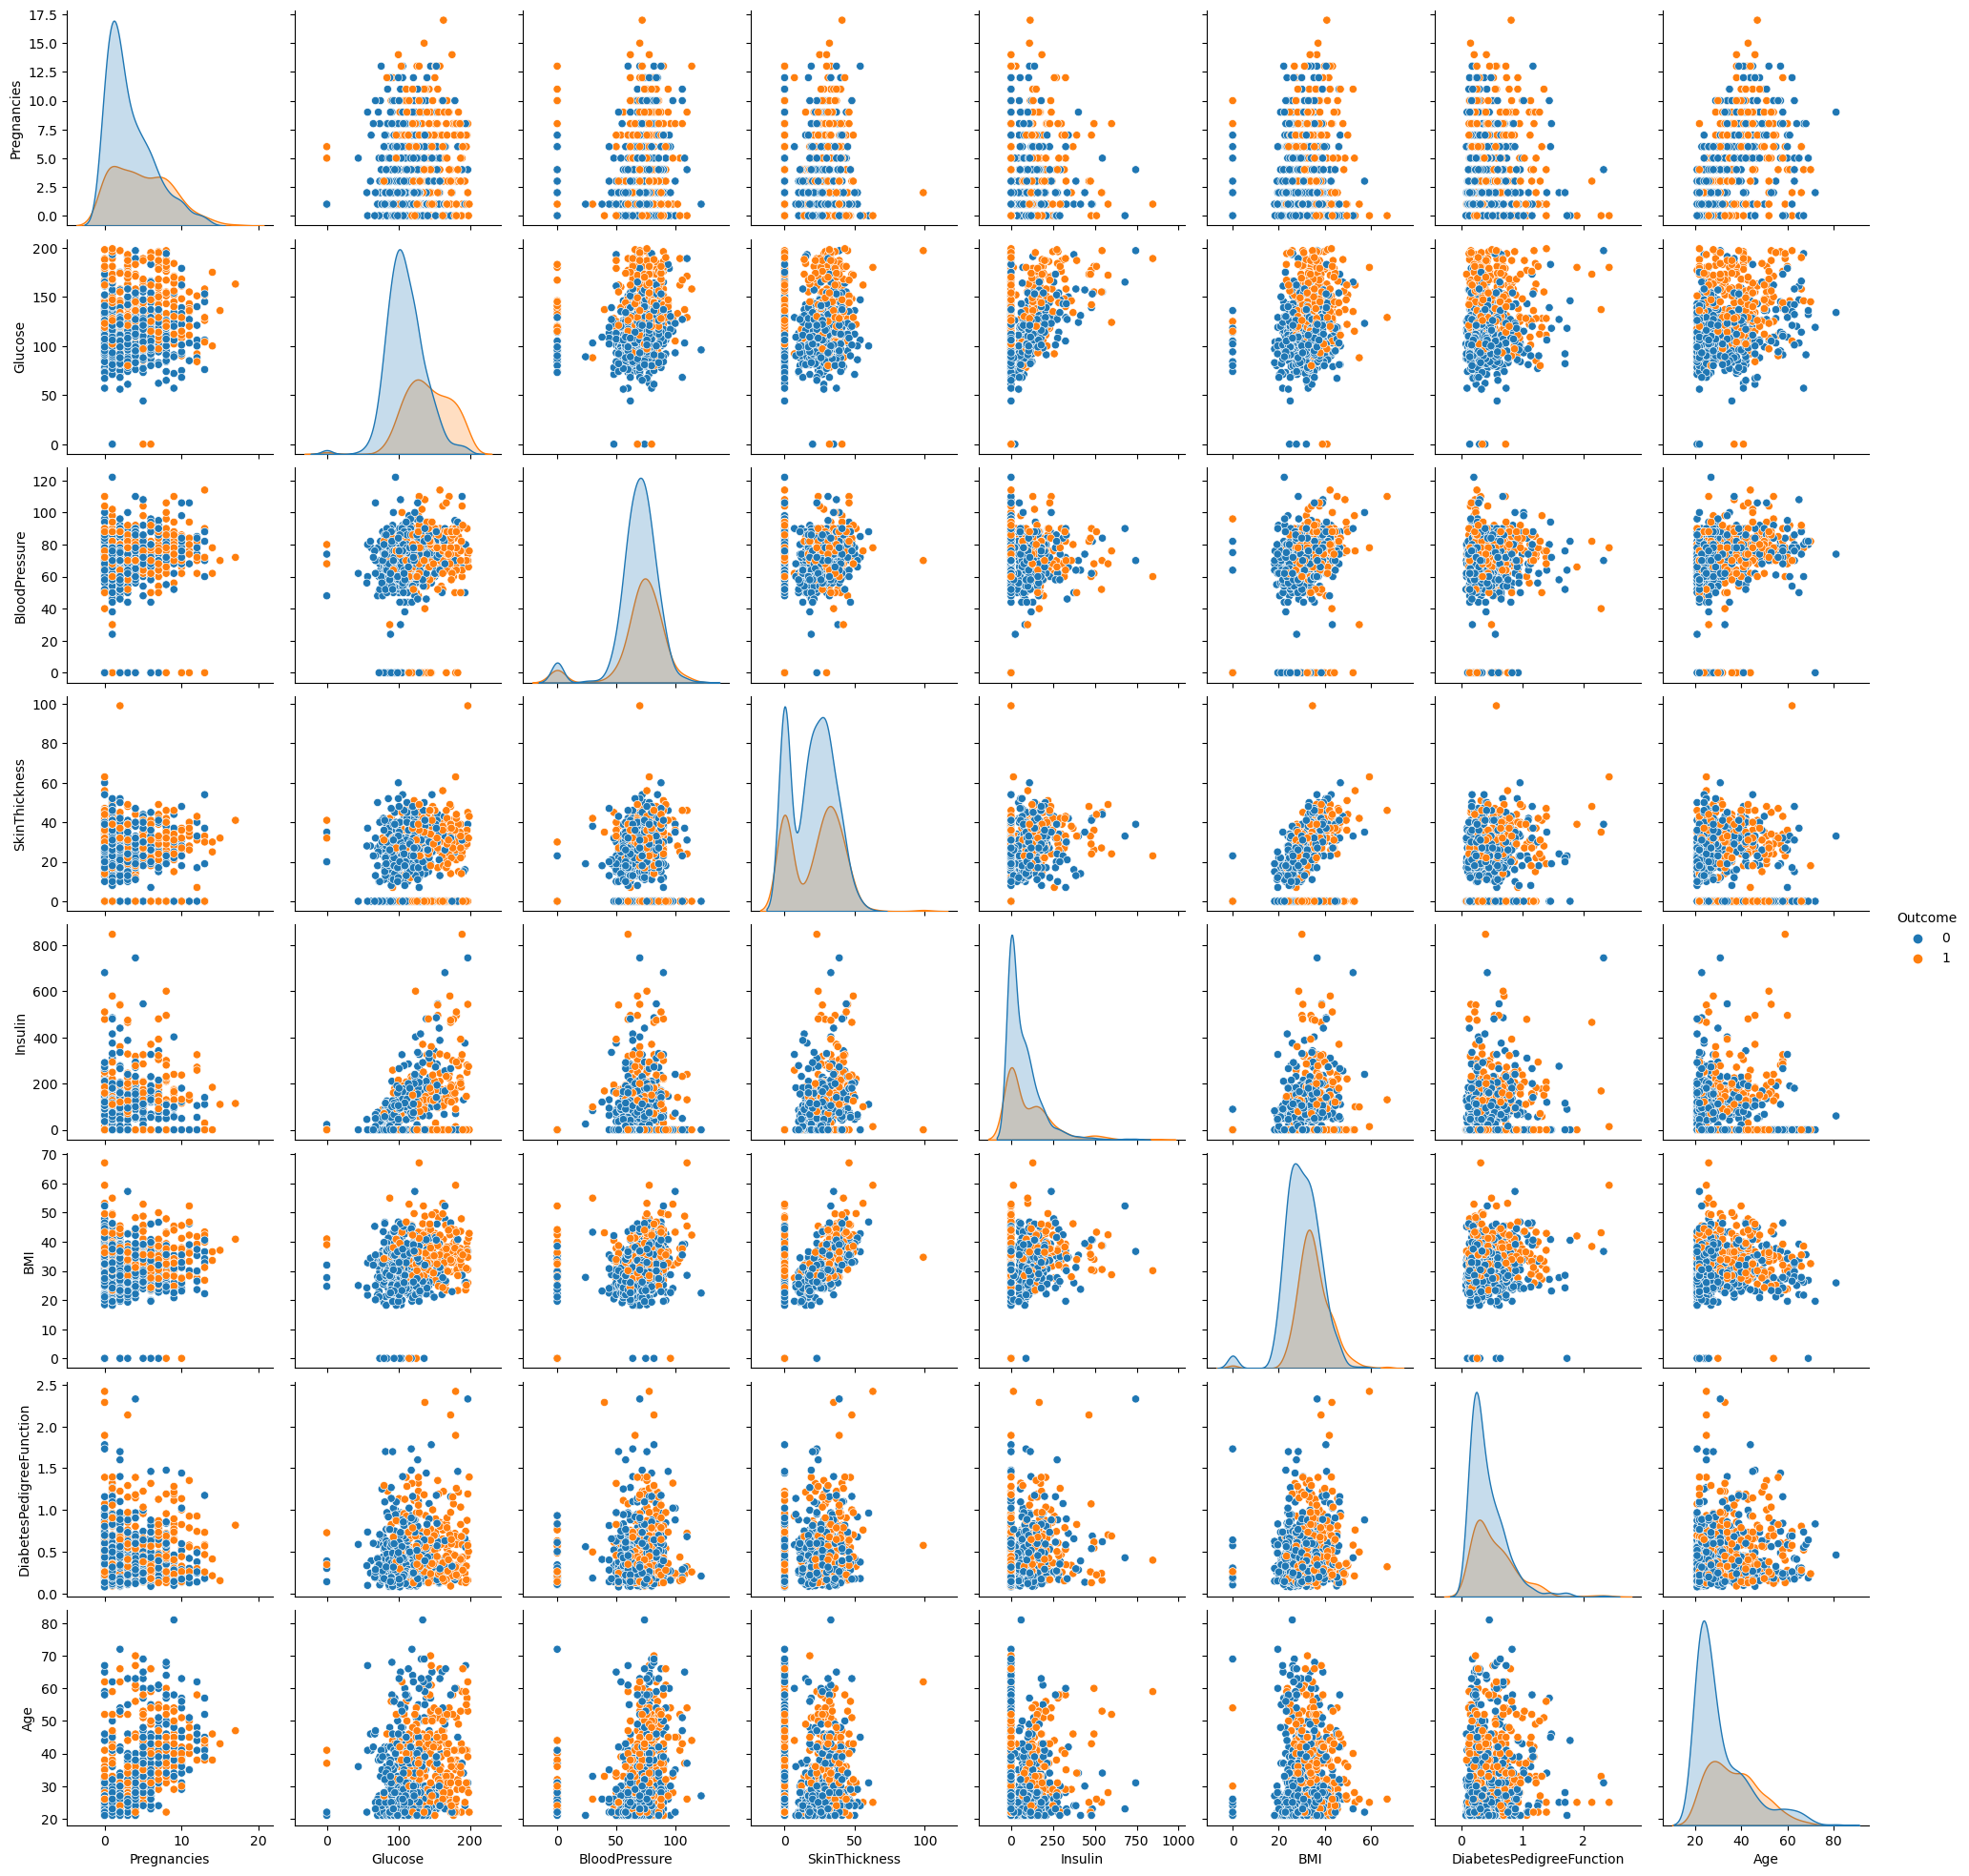

In [53]:
# How are the predictor variables related to the outcome variable?
sns.pairplot(data, hue="Outcome")
plt.show()

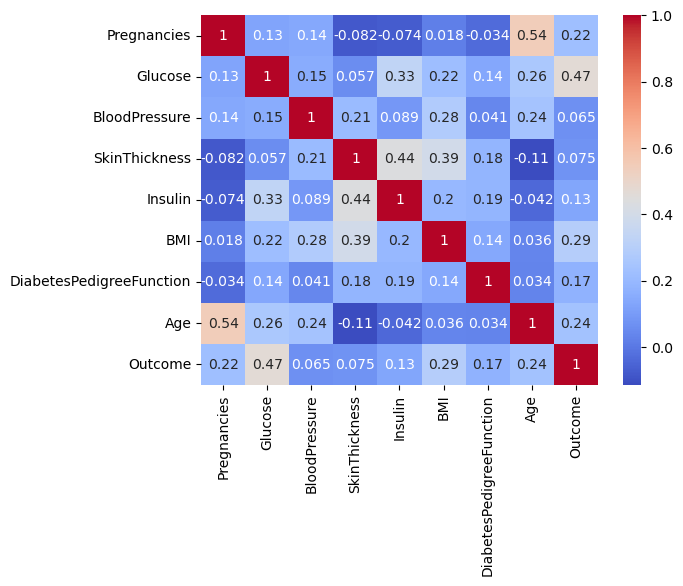

In [54]:
# What is the correlation between the predictor variables?
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

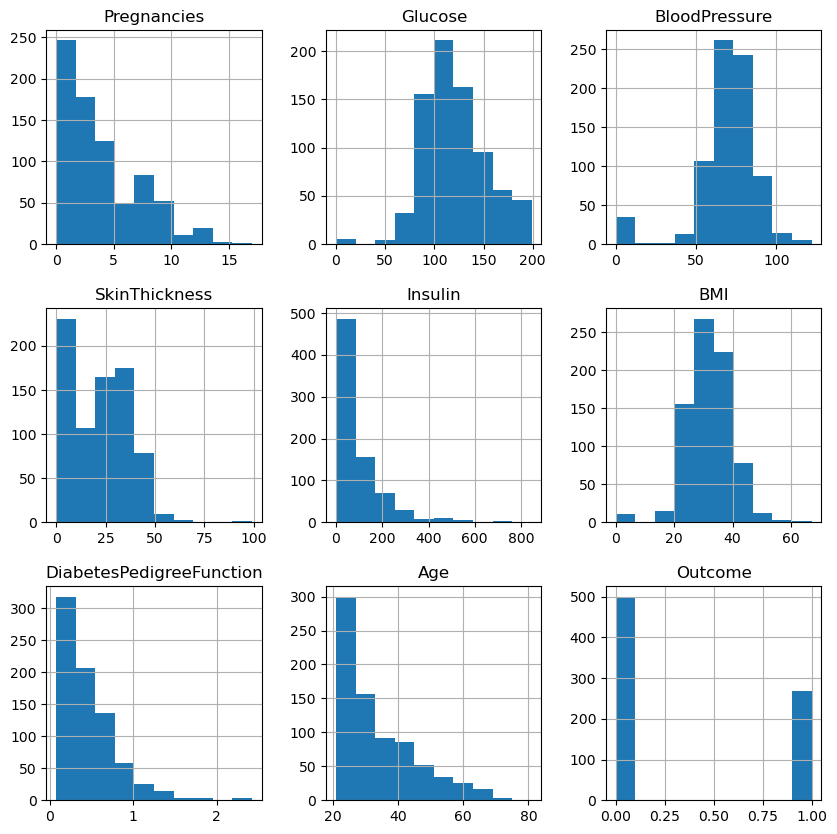

In [55]:
# What is the distribution of each predictor variable?
data.hist(figsize=(10, 10))
plt.show()

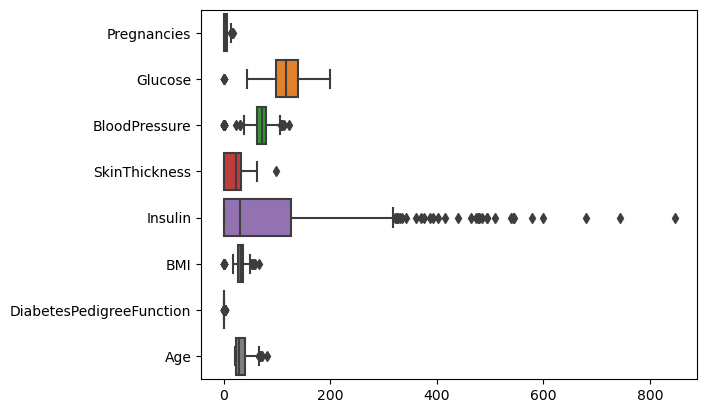

In [56]:
# Are there any outliers in the predictor variables?
sns.boxplot(data=data.drop(columns=["Outcome"]), orient="h")
plt.show()

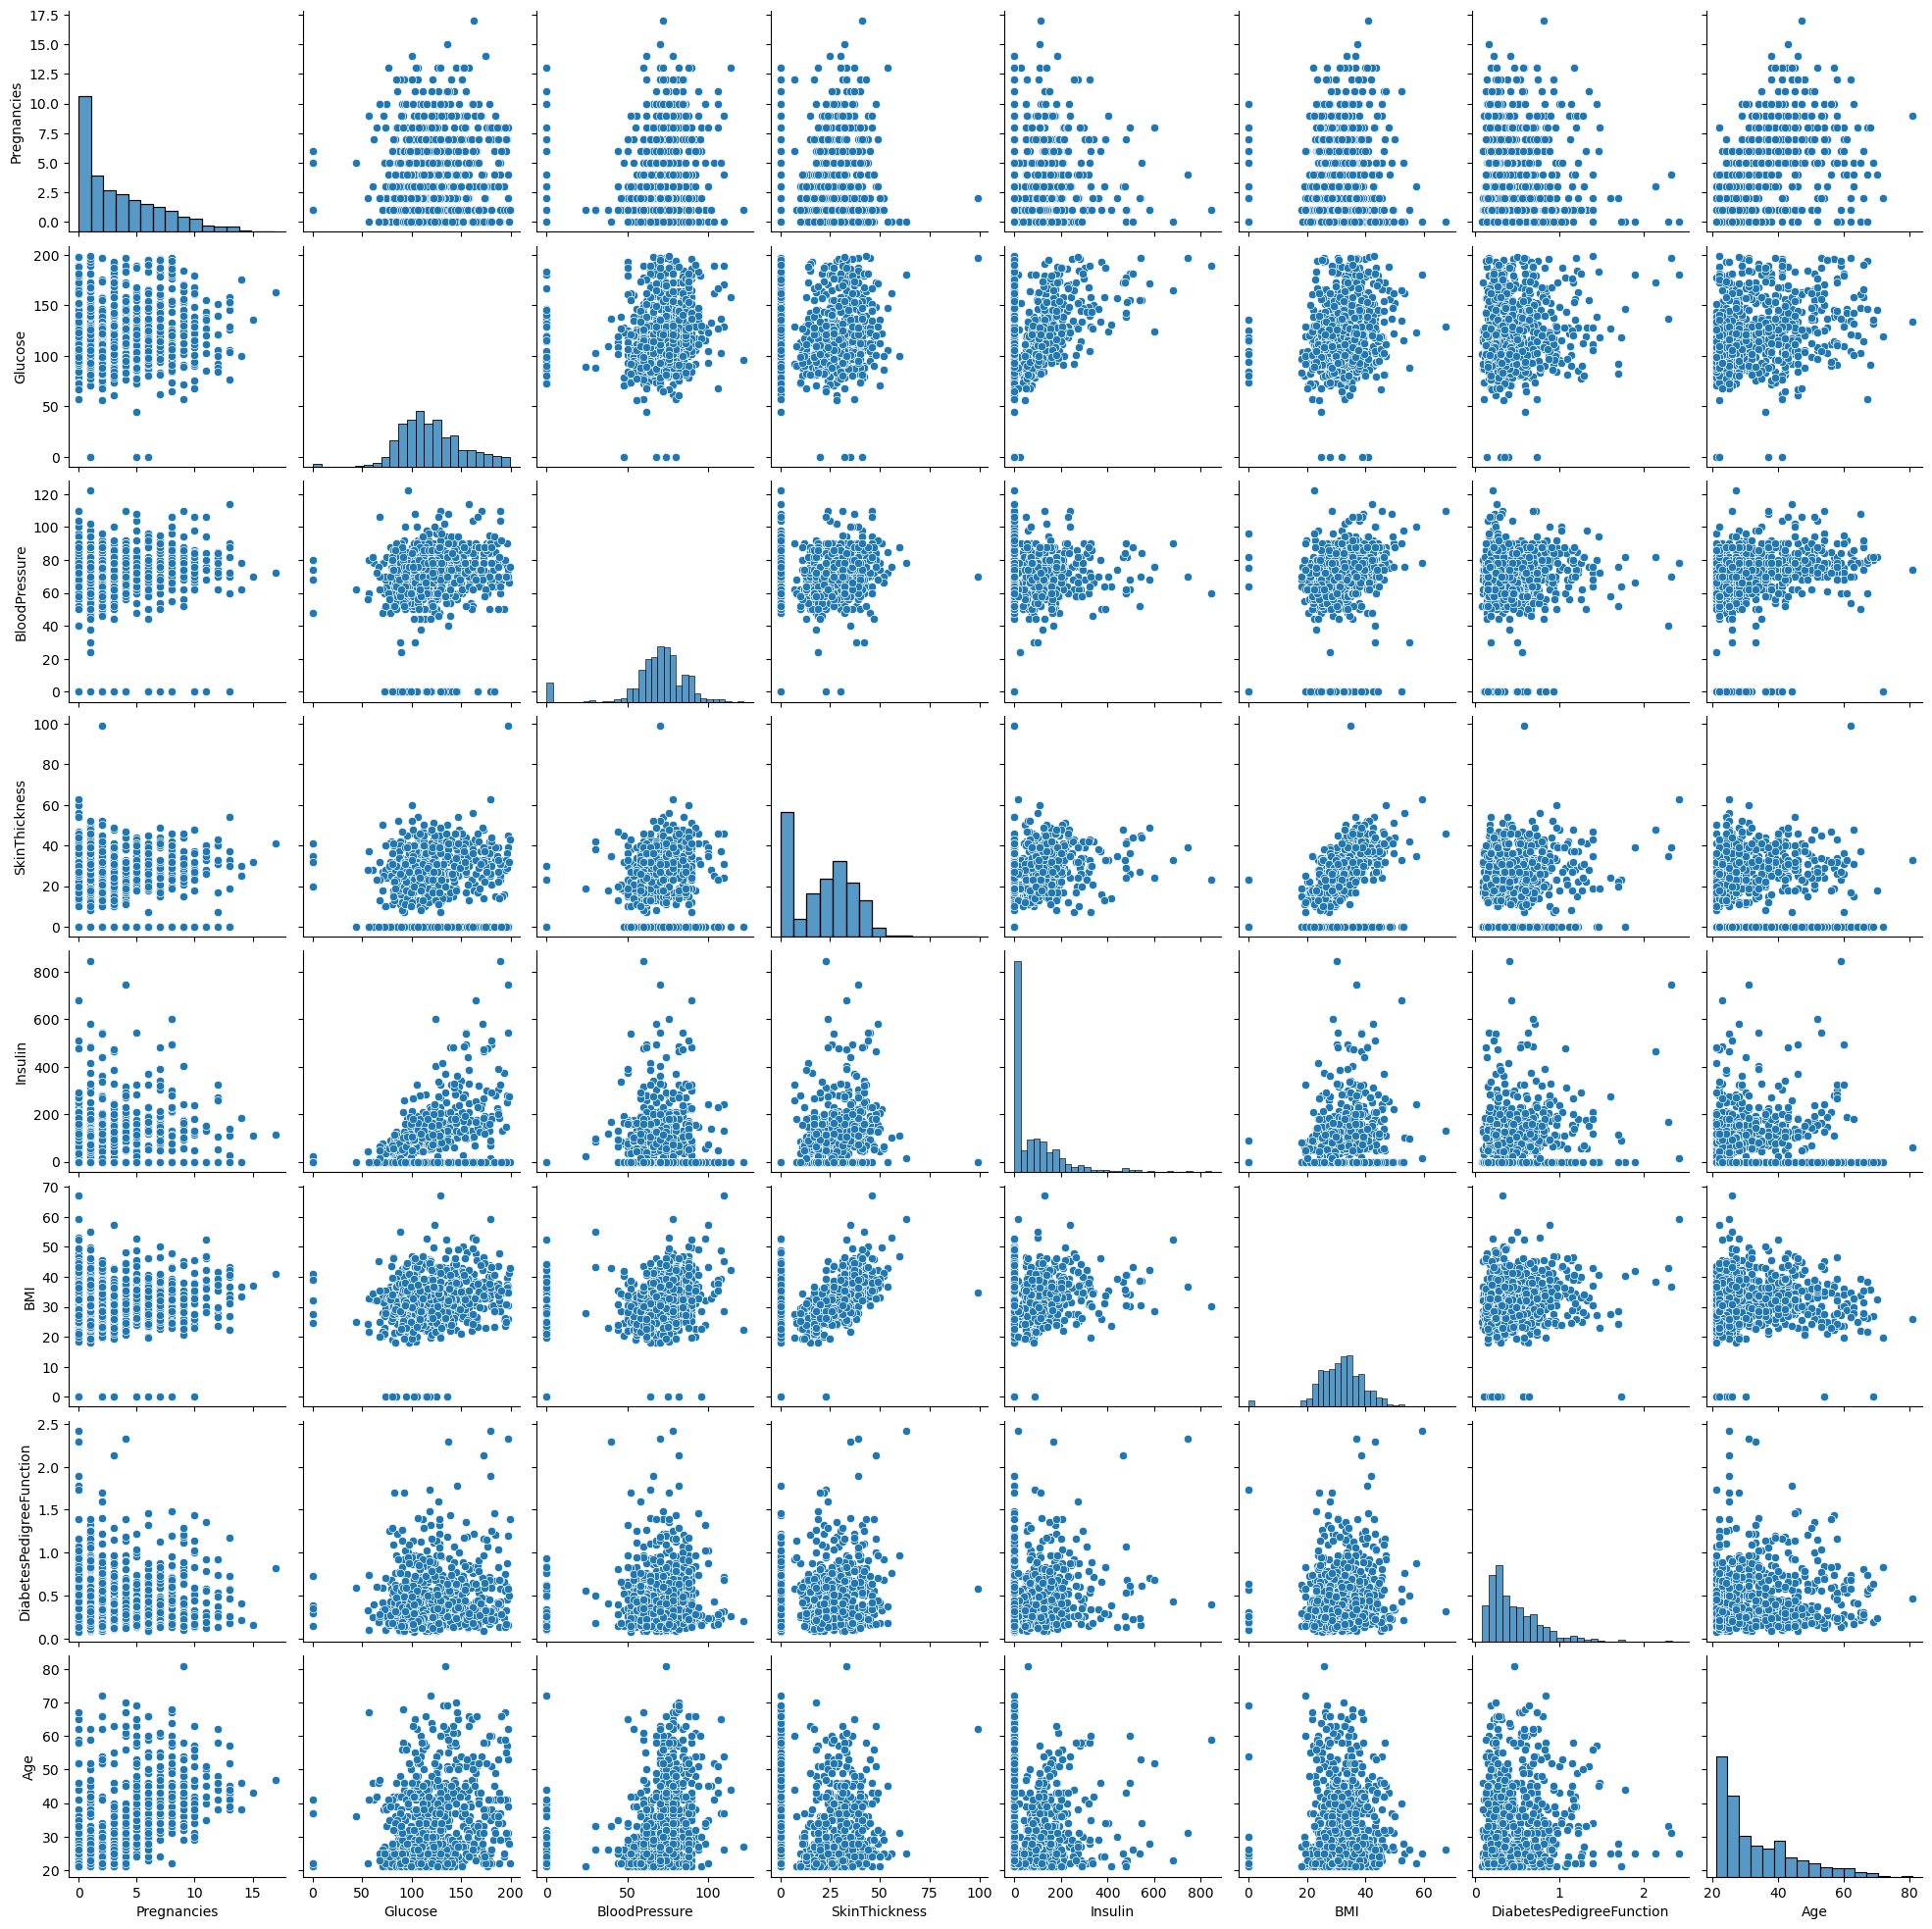

In [57]:
# How are the predictor variables related to each other?
sns.pairplot(data.drop(columns=["Outcome"]))
plt.show()

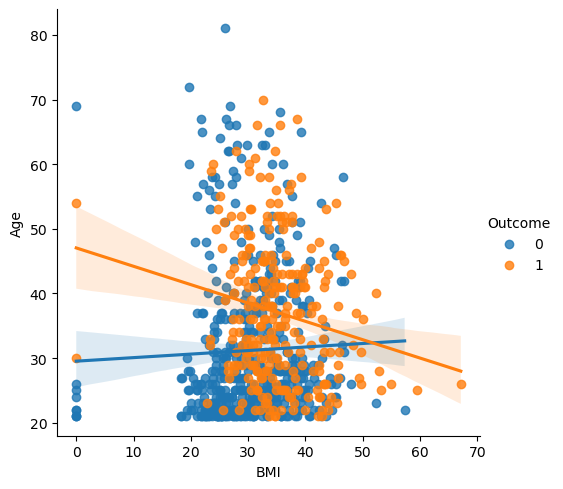

In [58]:
# Is there any interaction effect between the predictor variables?
sns.lmplot(x="BMI", y="Age", hue="Outcome", data=data)
plt.show()

In [59]:
# What is the average age of the individuals in the dataset?
average_age = data["Age"].mean()
print("Average Age:", average_age)

Average Age: 33.240885416666664


In [60]:
# What is the average glucose level for individuals with diabetes and without diabetes?
average_glucose_diabetes = data.loc[data["Outcome"] == 1, "Glucose"].mean()
average_glucose_no_diabetes = data.loc[data["Outcome"] == 0, "Glucose"].mean()
print("Average Glucose (Diabetes):", average_glucose_diabetes)
print("Average Glucose (No Diabetes):", average_glucose_no_diabetes)

Average Glucose (Diabetes): 141.25746268656715
Average Glucose (No Diabetes): 109.98


In [61]:
# What is the average BMI for individuals with diabetes and without diabetes?
average_bmi_diabetes = data.loc[data["Outcome"] == 1, "BMI"].mean()
average_bmi_no_diabetes = data.loc[data["Outcome"] == 0, "BMI"].mean()
print("Average BMI (Diabetes):", average_bmi_diabetes)
print("Average BMI (No Diabetes):", average_bmi_no_diabetes)

Average BMI (Diabetes): 35.14253731343278
Average BMI (No Diabetes): 30.30419999999996


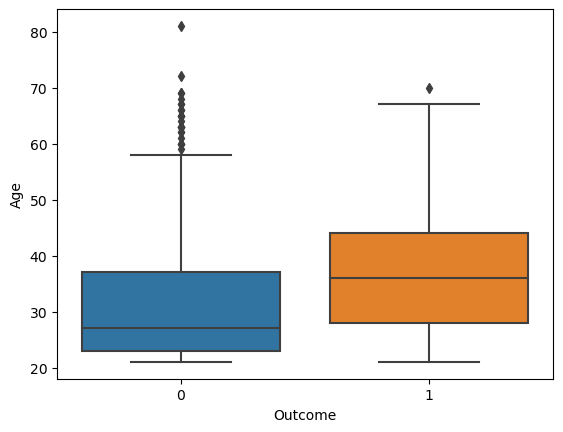

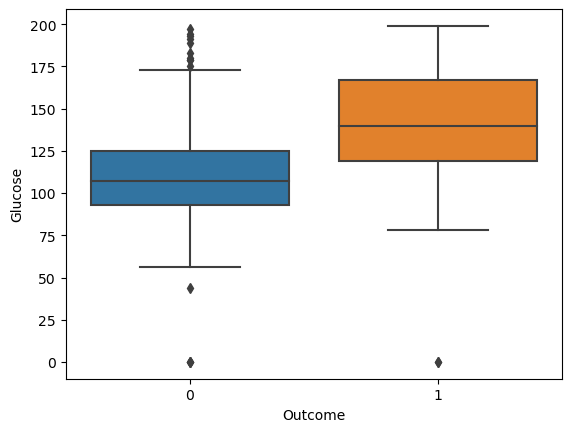

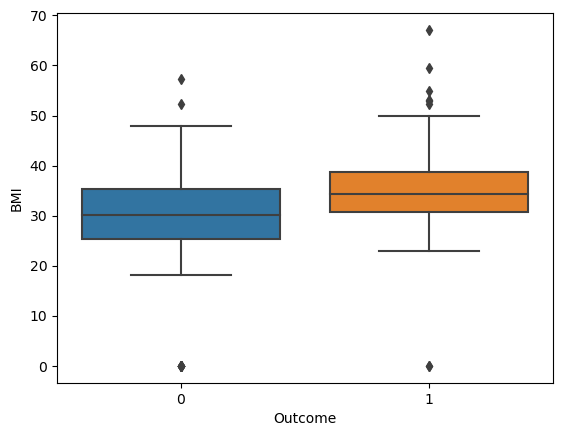

In [62]:
# How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
sns.boxplot(data=data, x="Outcome", y="Age")
plt.show()
sns.boxplot(data=data, x="Outcome", y="Glucose")
plt.show()
sns.boxplot(data=data, x="Outcome", y="BMI")
plt.show()

In [63]:
# Are there any differences in the predictor variables between males and females (if gender information is available)?


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [64]:
# Handling missing values (treating 0 values as missing)
data["Insulin"] = data["Insulin"].replace(0, pd.NA)
data["SkinThickness"] = data["SkinThickness"].replace(0, pd.NA)
data["BMI"] = data["BMI"].replace(0, pd.NA)

# Replace 0 values with the median
data["Insulin"] = data["Insulin"].fillna(data["Insulin"].median())
data["SkinThickness"] = data["SkinThickness"].fillna(data["SkinThickness"].median())
data["BMI"] = data["BMI"].fillna(data["BMI"].median())

data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
2,8,183,64,29.0,125.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,125.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,29.0,125.0,30.1,0.349,47,1


In [65]:
# Handling outliers
def handle_outliers(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[column] = data[column].clip(lower_bound, upper_bound)
    return data

# Specify the columns to handle outliers
columns_to_handle_outliers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age']

# Handle outliers in the specified columns
data = handle_outliers(data, columns_to_handle_outliers)



In [66]:
data.describe()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,28.866536,124.691081,32.393359,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,7.442353,7.913595,6.667471,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,14.500000,112.875000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,42.500000,135.875000,50.250000,1.200000,66.500000,1.000000


In [69]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# Scaling and normalization
data_scale = data.copy()

# standart scaler
ss = StandardScaler()
data_scale["Age_standard_scaler"] = ss.fit_transform(data_scale[["Age"]])
data_scale.head()

# robust scaler
rs = RobustScaler()
data_scale["Age_robuts_scaler"] = rs.fit_transform(data_scale[["Age"]])

# min-max scaler
# The range can be given with the feature_range=() argument
mms = MinMaxScaler() # default range from 0 to 1
data_scale["Age_min_max_scaler"] = mms.fit_transform(data_scale[["Age"]]) 

data_scale.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1,1.445691,1.235294,0.637363
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0,-0.189304,0.117647,0.219780
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1,-0.103252,0.176471,0.241758
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0,-1.049828,-0.470588,0.000000
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1,-0.017199,0.235294,0.263736


In [73]:
rs = RobustScaler()
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i in num_cols:
    data[i] = rs.fit_transform(data[[i]])

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000000,0.857143,0.000000,0.142857,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.000000,0.000000,-0.626374,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,0.000000,0.000000,-0.989011,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,-0.857143,-2.108696,-0.461538,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.857143,1.891304,1.186813,2.163399,0.235294,1


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.3, random_state=42)

In [74]:
# Model 1: Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_preds = logreg.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_precision = precision_score(y_test, logreg_preds)
logreg_recall = recall_score(y_test, logreg_preds)
logreg_f1 = f1_score(y_test, logreg_preds)
logreg_roc_auc = roc_auc_score(y_test, logreg_preds)

print("Logistic Regression Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)
print("ROC-AUC:", logreg_roc_auc)

Logistic Regression Metrics:
Accuracy: 0.7229437229437229
Precision: 0.6
Recall: 0.6
F1-score: 0.6
ROC-AUC: 0.6940397350993378


In [75]:
# Model 2: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_roc_auc = roc_auc_score(y_test, rf_preds)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("ROC-AUC:", rf_roc_auc)

Random Forest Metrics:
Accuracy: 0.7445887445887446
Precision: 0.6265060240963856
Recall: 0.65
F1-score: 0.6380368098159509
ROC-AUC: 0.7223509933774834


In [76]:

# Model 3: SVM classifier
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions)
recall = recall_score(y_test, svm_predictions)
f1 = f1_score(y_test, svm_predictions)
roc_auc = roc_auc_score(y_test, svm_predictions)

print("SVM Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


SVM Metrics:
Accuracy: 0.7316017316017316
Precision: 0.6153846153846154
Recall: 0.6
F1-score: 0.6075949367088608
ROC-AUC: 0.7006622516556291


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Findings from the analysis and machine learning models:

- Exploratory Data Analysis (EDA) revealed that features such as Glucose, BMI, and Age showed notable correlations with the diabetes outcome, indicating their potential importance in predicting diabetes.
- Preprocessing steps, including handling missing values, feature engineering, and scaling, were performed to prepare the data for machine learning models.
- Three machine learning models were trained and evaluated: Logistic Regression, Random Forest, and Support Vector Machine (SVM).
- The Random Forest model achieved the highest overall performance with an accuracy of 74.5%, precision of 62.7%, recall of 65.0%, F1-score of 63.8%, and ROC-AUC of 72.2%.